_

Support Vector Machines


__Features__  
* V1, V2, ... V28: are principal components obtained with PCA  
* Time: the seconds elapsed between each transaction and the first transaction  
* Amount: is the transaction Amount  
* Class: the predicted variable; 1 in case of fraud and 0 otherwise.  

Given the class imbalance ratio, it is recommended to use precision, recall and the 
Area Under the Precision-Recall Curve (AUPRC) to evaluate skill. Traditional accuracy 
and AUC are not meaningful for highly unbalanced classification. These scores are 
misleading due to the high impact of the large number of negative cases that can easily
be identified. 

Examining precision and recall is more informative as these disregard the number of 
correctly identified negative cases (i.e. TN) and focus on the number of correctly 
identified positive cases (TP) and mis-identified negative cases (FP). Another useful 
metric is the F1 score which is the harmonic mean of the precision and recall; 1 is the 
best F1 score.

Confusion Matrix  
[TN  FP]  
[FN  TP]

Accuracy = $\frac{TN + TP}{TN + TP + FN + FP}$  
TPR = $\frac{TP}{TP + FN}$  
FPR = $\frac{FP}{FP + TN}$  

Recall = TPR = $\frac{TP}{TP + FN}$  
Precision = $\frac{TP}{TP + FP}$  
F1 Score = 2 * $\frac{precision\; \times\; recall}{precision \; + \; recall}$  

See the references below for more details on precision, recall, and the F1 score.


The dataset was collected and analysed during a research collaboration of 
Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université 
Libre de Bruxelles) on big data mining and fraud detection [1]

[1] Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi.
Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium
on Computational Intelligence and Data Mining (CIDM), IEEE, 2015.
http://mlg.ulb.ac.be/BruFence . http://mlg.ulb.ac.be/ARTML


### Objectives
* Understanding Support Vector Machines
* GridSearch with Classification
* Creating Scoring functions
* Stratification

### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Sci-kit Learn Ensemble Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
* [Sci-kit Learn Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Scoring Parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
* [Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)
* [Plot ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
* [Precision, Recall, F1 Score](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Precision-Recall Curve](https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used)
* [Probability Plot](https://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm)


In [1]:
# THESE FIRST 3 IMPORTS ARE CUSTOM .py FILES AND CAN BE FOUND ON THE GITHUB and in the mlp_2020 folder
import visualize
import metrics_plots
from pipeline_components import DataSampleDropper, DataFrameSelector

import pandas as pd
import numpy as np
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools
import time as timelib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from math import floor, ceil
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import make_scorer, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import roc_curve, auc, f1_score, recall_score
from sklearn.svm import SVC
import joblib 

HOME_DIR = pathlib.Path.home()
CW_DIR = pathlib.Path.cwd()

FIGW = 12
FIGH = 5
FONTSIZE = 8

plt.rcParams['figure.figsize'] = (FIGW, FIGH)
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

%matplotlib inline

/opt/oscer/software/SciPy-bundle/2019.11-foss-2019a-Python-3.8.0/lib/python3.8/site-packages/scipy/optimize/_shgo.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cons['type'] is 'ineq':
/opt/oscer/software/SciPy-bundle/2019.11-foss-2019a-Python-3.8.0/lib/python3.8/site-packages/scipy/optimize/_shgo.py:743: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(self.X_min) is not 0:


# LOAD DATA

In [2]:
# TODO: set appropriately
filename = '../sai_HW/creditcard.csv'

# Read the CSV file and extract the table
crime_stats_full = pd.read_csv(filename, delimiter=',', nrows=None)
crime_stats_full.dataframeName = 'creditcard.csv'
nRows, nCols = crime_stats_full.shape
print(f'There are {nRows} rows and {nCols} columns')

There are 191828 rows and 31 columns


In [3]:
""" PROVIDED
good (negative case = 0)
fraud (positive case = 1)
"""
targetnames = ['good', 'fraud']

pos_full = crime_stats_full.loc[crime_stats_full['Class'] == 1] 
neg_full = crime_stats_full.loc[crime_stats_full['Class'] == 0] 

pos_full.shape, neg_full.shape

((377, 31), (191450, 31))

In [4]:
""" PROVIDED
Compute the postive fraction
"""
pos_fraction = pos_full.shape[0] / nRows
neg_fraction = 1 - pos_fraction

pos_fraction, neg_fraction

(0.001965302249932231, 0.9980346977500678)

In [5]:
""" PROVIDED
Select Random Subset of data
"""
np.random.seed(42)
subset_size = 20000
selected_indices = np.random.choice(range(nRows), size=subset_size, replace=False)
selected_indices

array([163072, 187313,  46918, ...,  52564, 131788, 122135])

In [6]:
""" PROVIDED
List the features and shape of the data
"""
crime_stats = crime_stats_full.loc[selected_indices, :]
crime_stats.columns, crime_stats.shape

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'), (20000, 31))

In [7]:
""" PROVIDED
Display whether there are any NaNs
"""
crime_stats.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [8]:
""" TODO
Display summary statistics for each feature of the dataframe
"""
crime_stats.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,68168.636400,-0.118134,0.008681,0.354336,0.077625,-0.126186,0.065080,-0.051549,0.019335,0.002580,...,-0.018472,-0.060702,-0.017039,0.005638,0.066561,0.008333,0.000691,0.004116,91.044592,0.001850
std,32954.378855,1.885755,1.616425,1.445899,1.390710,1.387181,1.322202,1.282970,1.268849,1.133820,...,0.774584,0.688889,0.622117,0.610069,0.494183,0.490176,0.392428,0.324506,246.271015,0.042974
min,4.000000,-36.510583,-40.938048,-33.680984,-5.519697,-32.092129,-16.107178,-41.506796,-50.943369,-13.434066,...,-22.665685,-8.887017,-26.429741,-2.824849,-4.564506,-1.732917,-7.689004,-6.129245,0.000000,0.000000
25%,43345.250000,-0.960985,-0.577373,-0.287468,-0.781388,-0.795151,-0.701900,-0.582631,-0.177708,-0.670087,...,-0.229047,-0.550176,-0.170673,-0.341978,-0.230974,-0.329202,-0.067751,-0.037834,5.910000,0.000000
50%,65394.000000,-0.119882,0.083273,0.515748,0.079977,-0.178941,-0.208207,-0.011930,0.049562,-0.083187,...,-0.046745,-0.042798,-0.030159,0.053605,0.112425,-0.057837,0.006421,0.019285,22.780000,0.000000
75%,85887.250000,1.204556,0.794027,1.237961,0.900628,0.454068,0.463569,0.503676,0.339365,0.626867,...,0.143429,0.404190,0.115393,0.423701,0.387684,0.262980,0.089749,0.078371,79.900000,0.000000
max,129422.000000,2.367002,21.467203,4.187811,11.864868,24.655965,21.393069,34.303177,17.903574,8.108122,...,27.202839,8.361985,15.879421,3.998294,7.519589,3.080588,6.144006,22.620072,7712.430000,1.000000


# VISUALIZE DATA

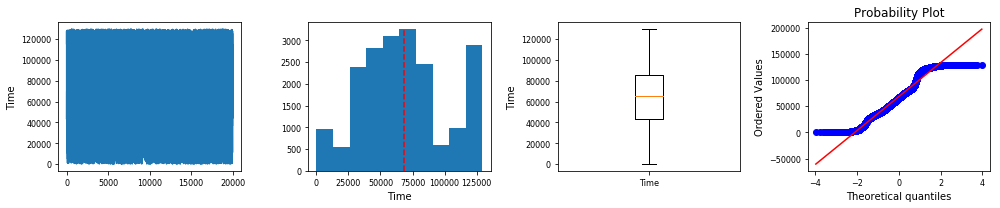

myplots Time


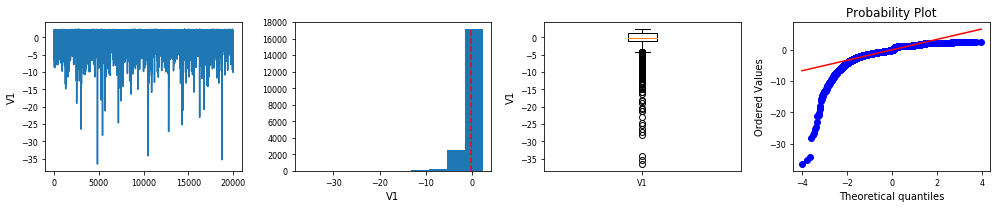

myplots V1


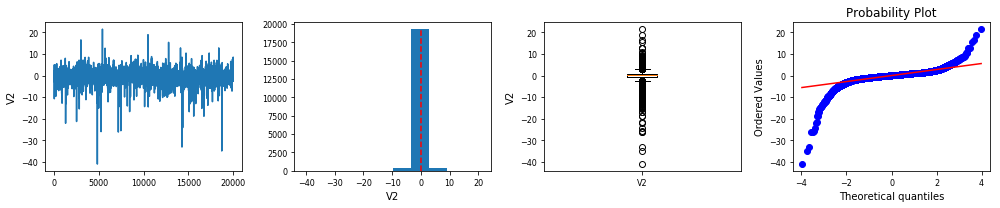

myplots V2


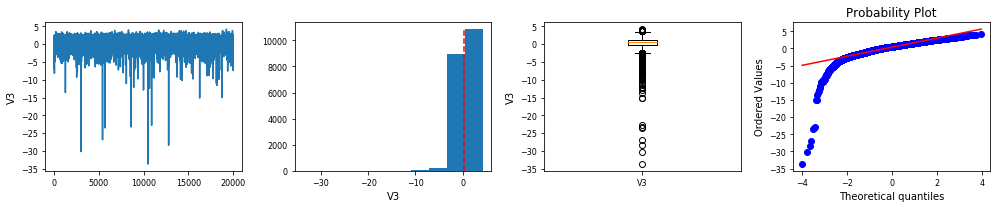

myplots V3


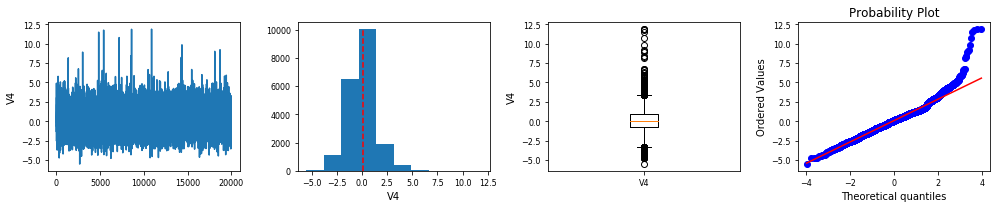

myplots V4


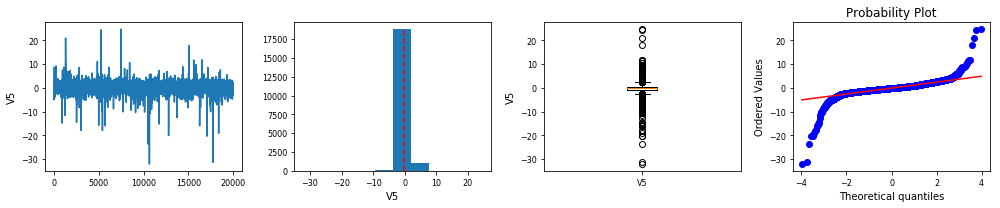

myplots V5


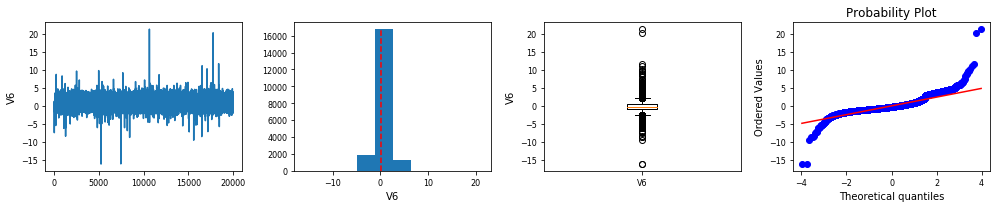

myplots V6


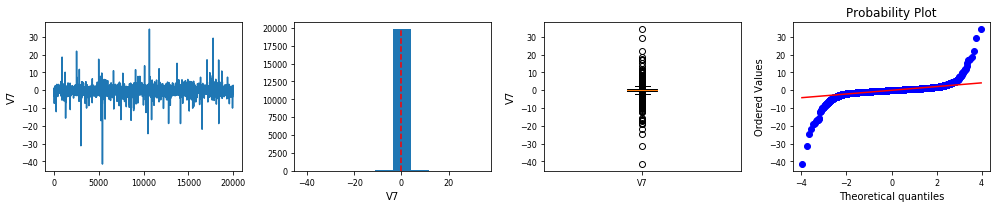

myplots V7


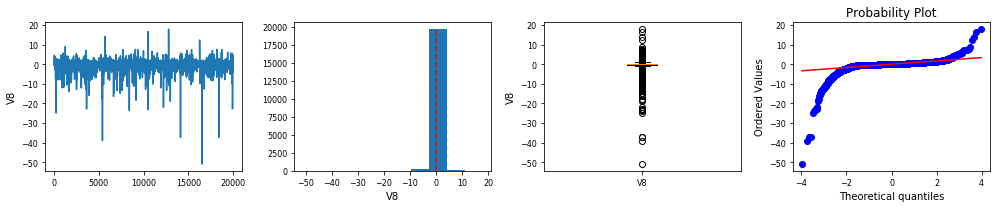

myplots V8


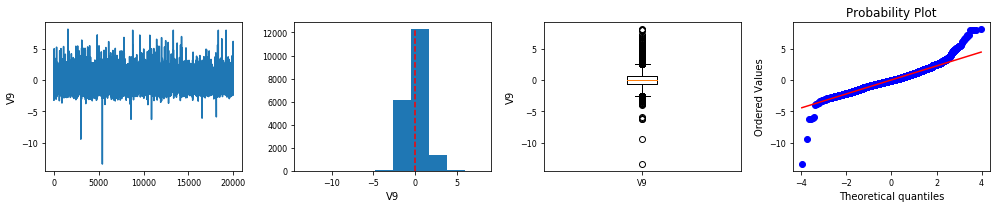

myplots V9


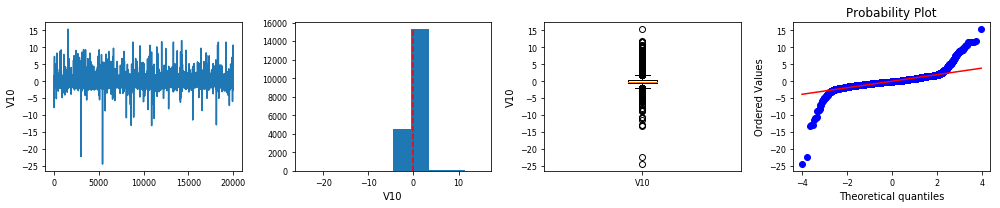

myplots V10


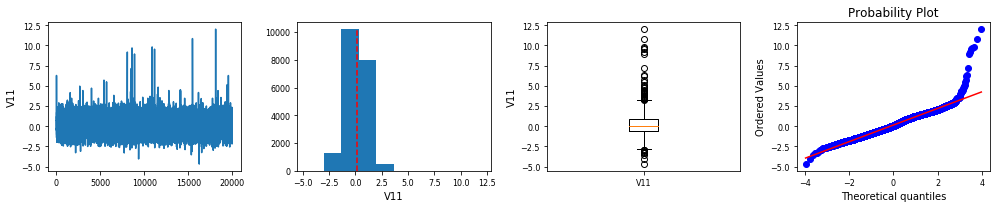

myplots V11


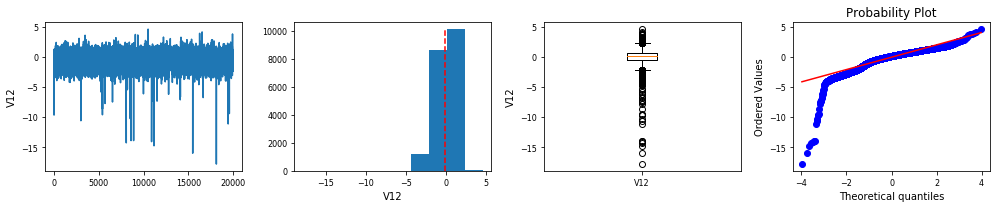

myplots V12


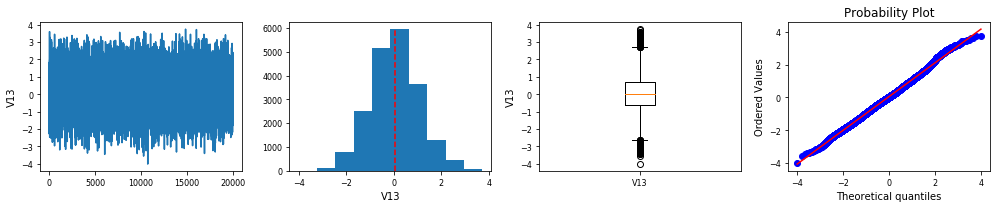

myplots V13


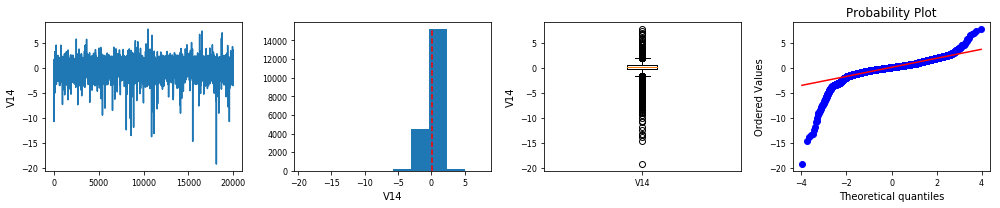

myplots V14


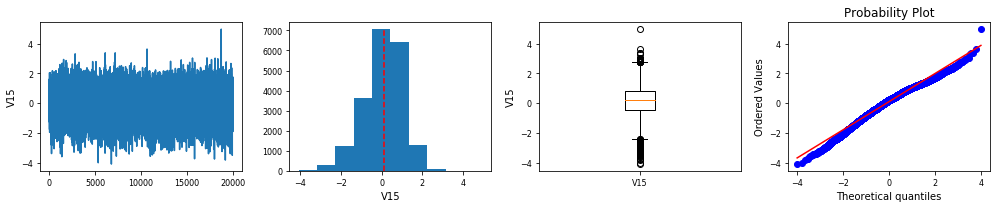

myplots V15


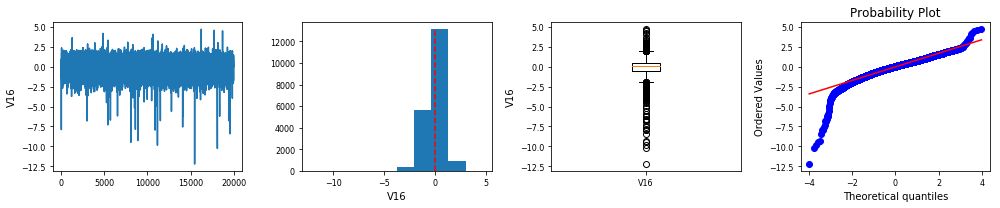

myplots V16


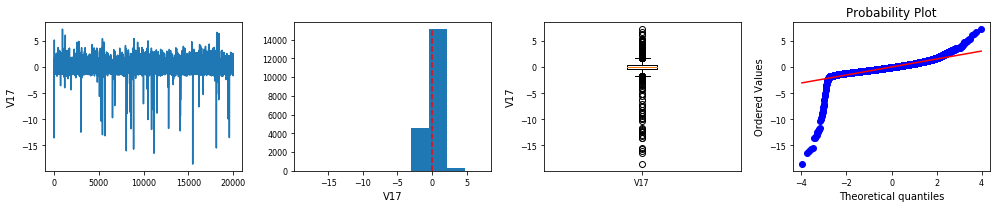

myplots V17


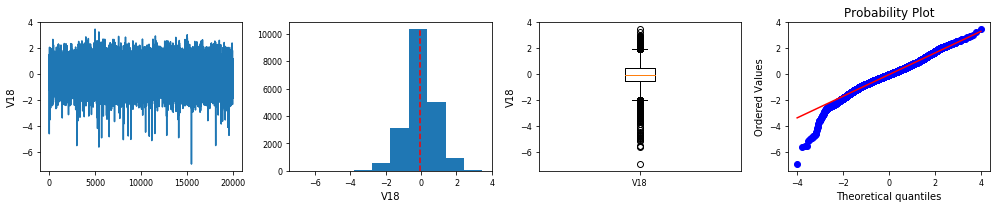

myplots V18


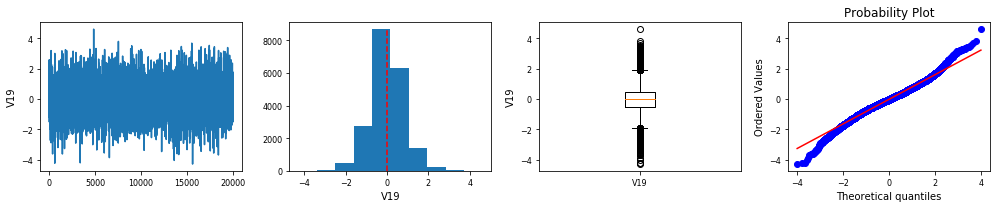

myplots V19


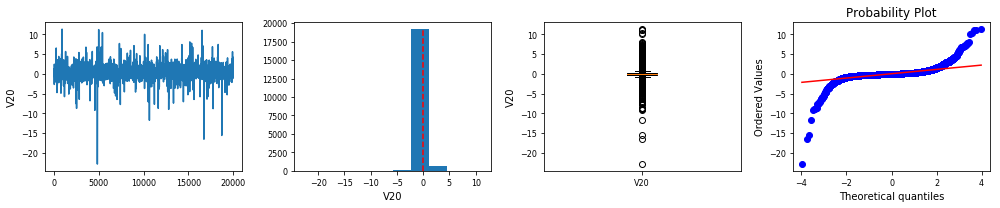

myplots V20


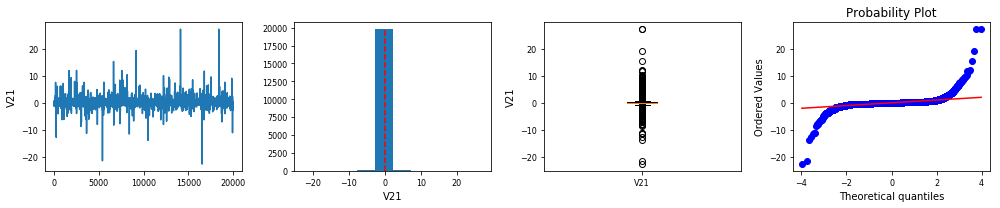

myplots V21


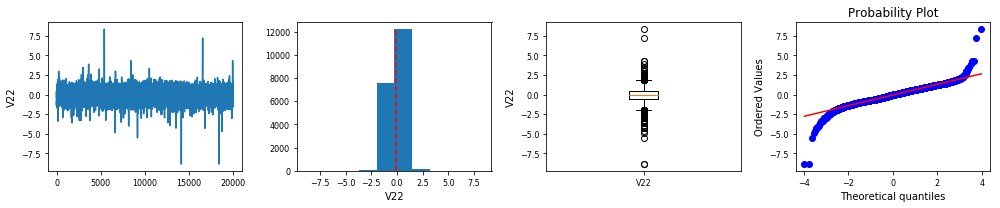

myplots V22


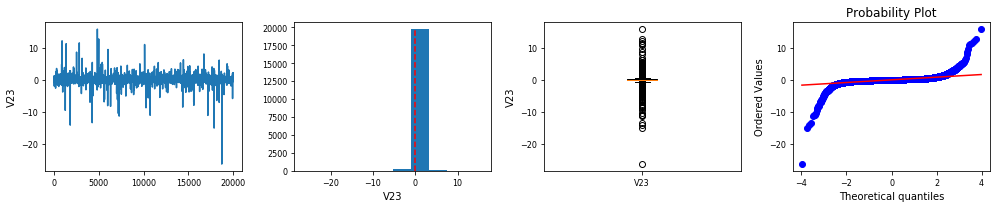

myplots V23


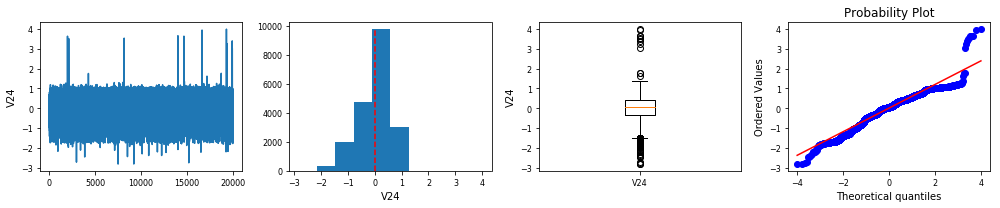

myplots V24


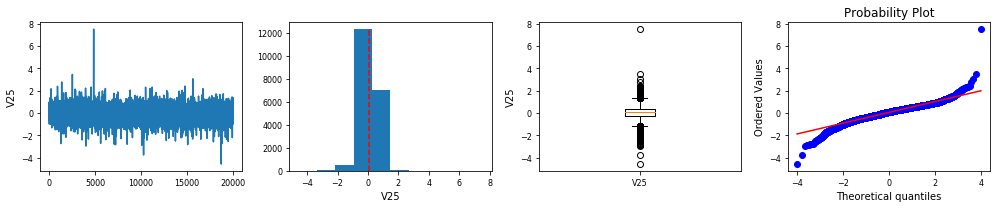

myplots V25


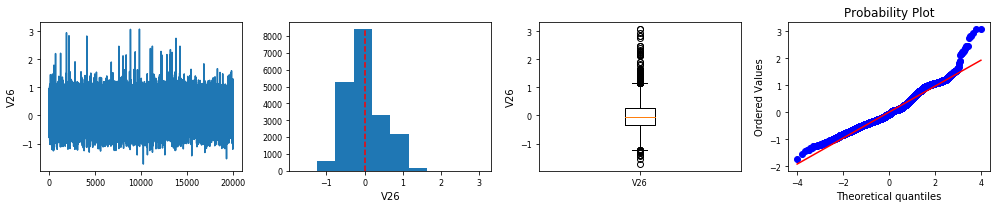

myplots V26


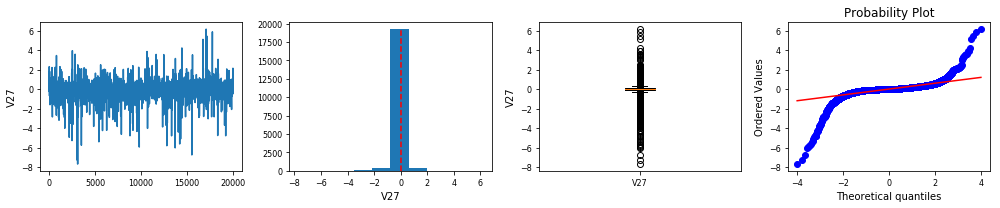

myplots V27


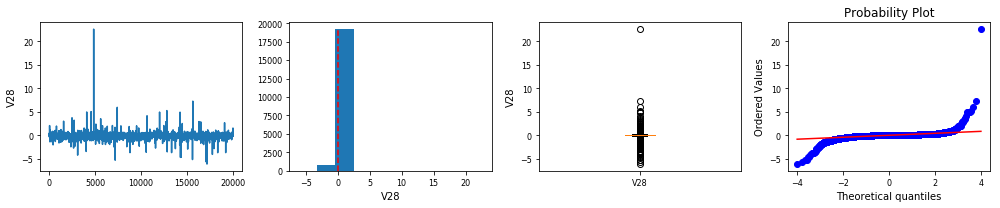

myplots V28


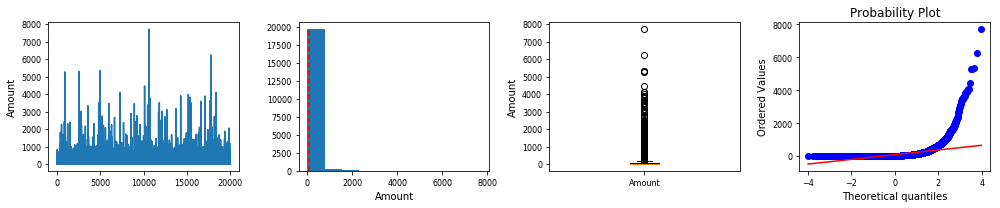

myplots Amount


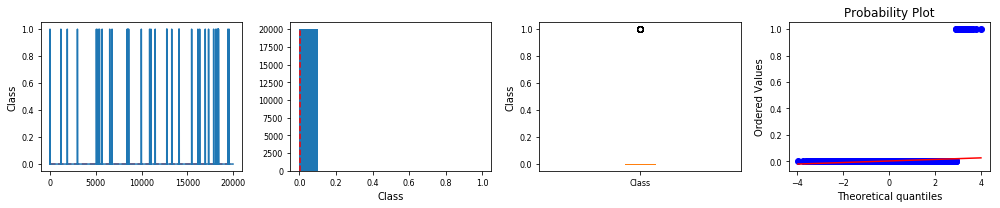

myplots Class


In [9]:
""" TODO
Display the distributions of the data
use visualize.featureplots(crime_stats_dropna.values, crime_stats.columns)
to generate trace plots, histograms, boxplots, and probability plots for
each feature.

A probability plot is used to evaulate the normality of a distribution.
The data are plotted against a theoritical distribution, such that if the data 
are normal, they'll follow the diagonal line. See the reference above for 
more information.
"""
crime_stats_dropna = crime_stats.dropna()
# TODO: visualize the features
visualize.featureplots(crime_stats_dropna.values, crime_stats.columns)

# Right click to enable scrolling

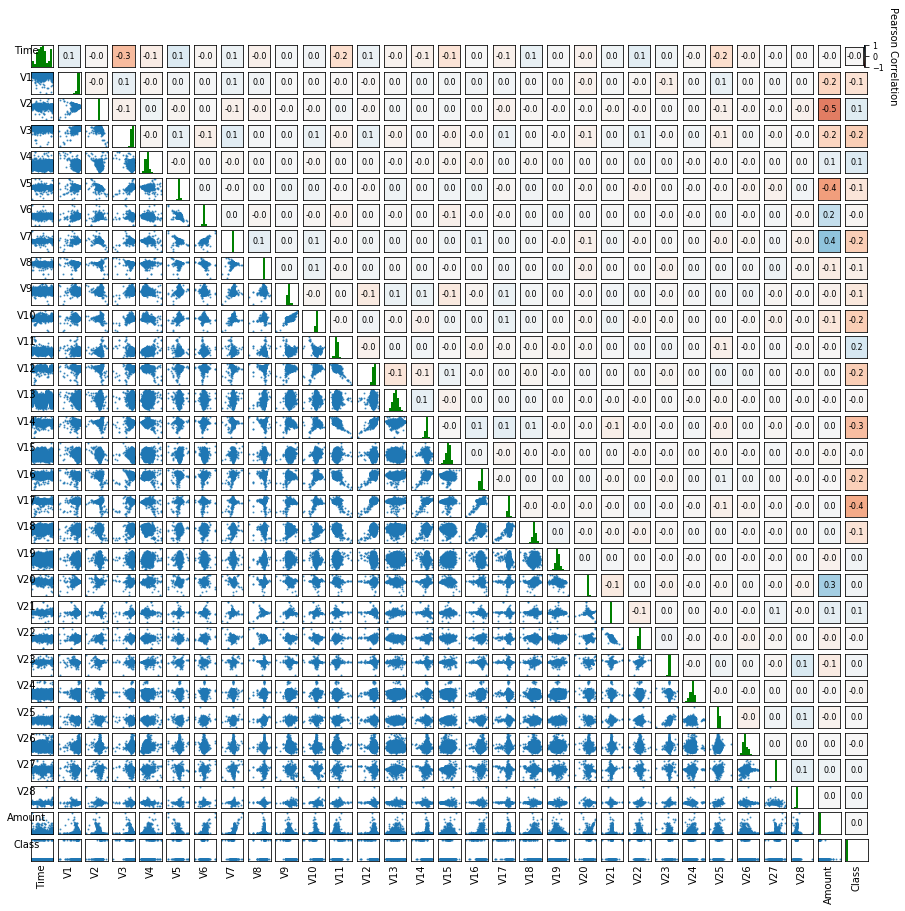

In [10]:
""" PROVIDED
Display the Pearson correlation between all pairs of the features
use visualize.scatter_corrplots(crime_stats_dropna.values, crime_stats.columns, corrfmt="%.1f", FIGW=15)
"""
visualize.scatter_corrplots(crime_stats_dropna.values, crime_stats.columns, corrfmt="%.1f", FIGW=15)

In [11]:
""" PROVIDED
Separate the postive and negative examples
"""
pos = crime_stats.loc[crime_stats['Class'] == 1] 
neg = crime_stats.loc[crime_stats['Class'] == 0] 

pos.shape, neg.shape

((37, 31), (19962, 31))

In [12]:
""" PROVIDED
Compute the postive fraction
"""
pos_fraction = pos.shape[0] / nRows
neg_fraction = 1 - pos_fraction

pos_fraction, neg_fraction

(0.00019288112267239402, 0.9998071188773276)

''

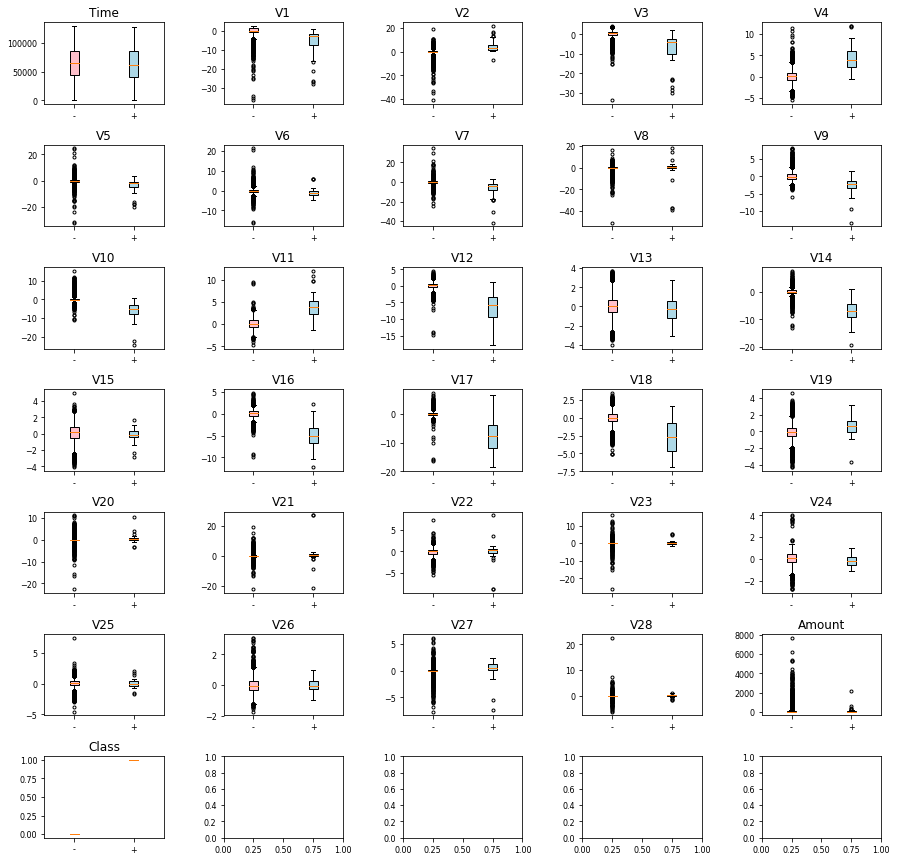

In [13]:
""" PROVIDED
Compare the features for the positive and negative examples
"""
features_displayed = pos.columns
ndisplayed = len(features_displayed)
ncols = 5
nrows = ceil(ndisplayed / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
fig.subplots_adjust(wspace=.5, hspace=.5)
axs = axs.ravel()
for ax, feat_name in zip(axs, features_displayed):
    boxplot = ax.boxplot([neg[feat_name], pos[feat_name]], patch_artist=True, sym='.')
    boxplot['boxes'][0].set_facecolor('pink')
    boxplot['boxes'][1].set_facecolor('lightblue')
    ax.set_xticklabels(['-', '+'])
    ax.set(title=feat_name)
""""""

# PRE-PROCESS DATA

## Data Clean Up and Feature Selection

In [14]:
""" PROVIDED
Construct Pipeline to pre-process data
"""
feature_names = crime_stats.columns.drop(['Class'])
pipe_X = Pipeline([
    ("NaNrowDropper", DataSampleDropper()),
    ("selectAttribs", DataFrameSelector(feature_names)),
    ("scaler", RobustScaler())
])

pipe_y = Pipeline([
    ("NaNrowDropper", DataSampleDropper()),
    ("selectAttribs", DataFrameSelector(['Class']))
])

In [15]:
""" TODO
Pre-process the data using the pipeliine
"""
X = pipe_X.fit_transform(crime_stats)
y = pipe_y.fit_transform(crime_stats)
np.any(np.isnan(X))

False

In [16]:
X.shape

(19999, 30)

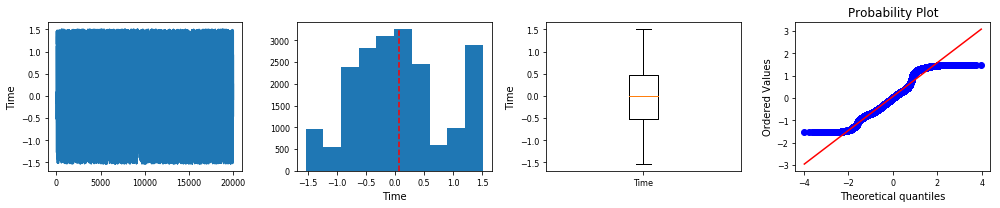

myplots Time


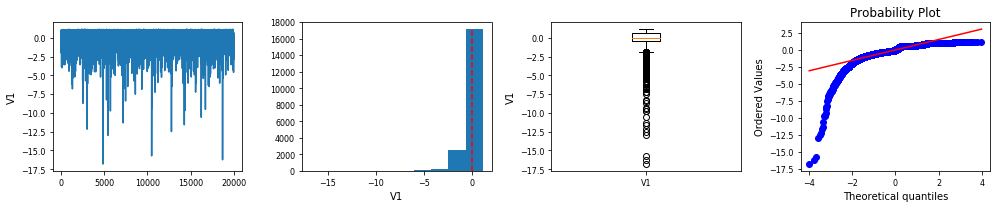

myplots V1


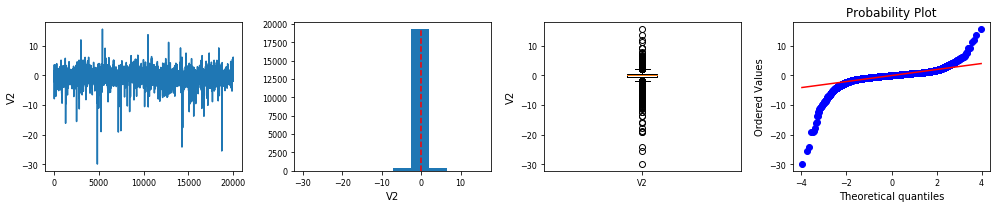

myplots V2


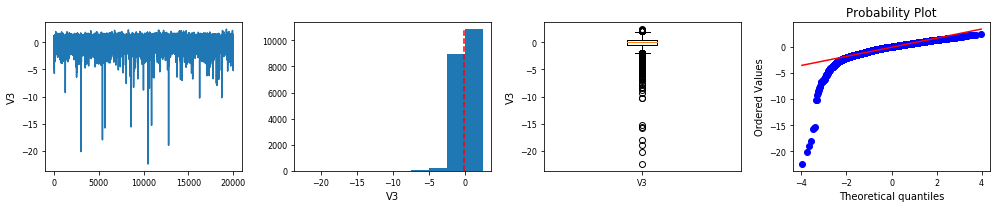

myplots V3


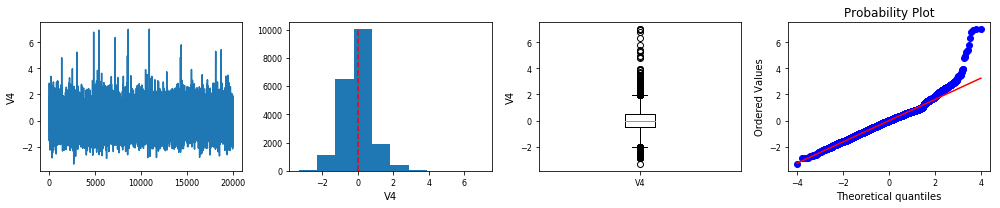

myplots V4


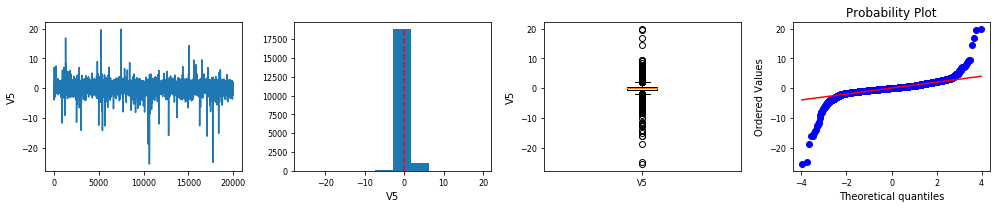

myplots V5


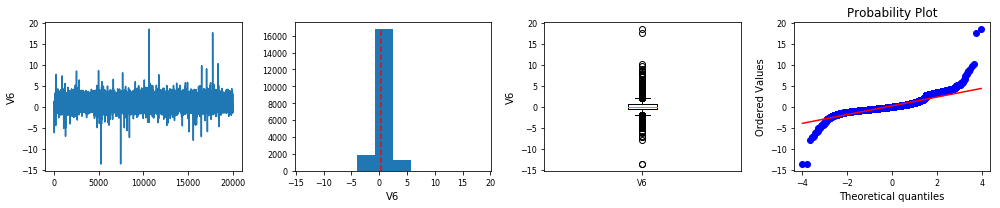

myplots V6


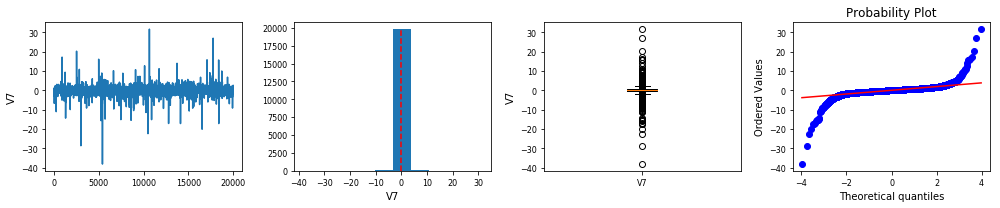

myplots V7


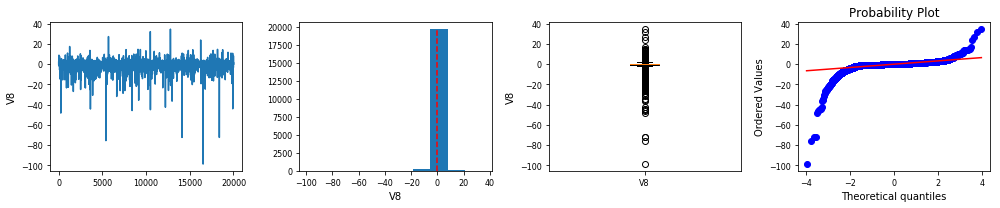

myplots V8


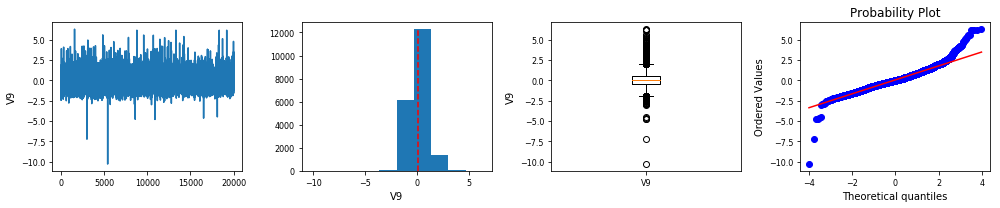

myplots V9


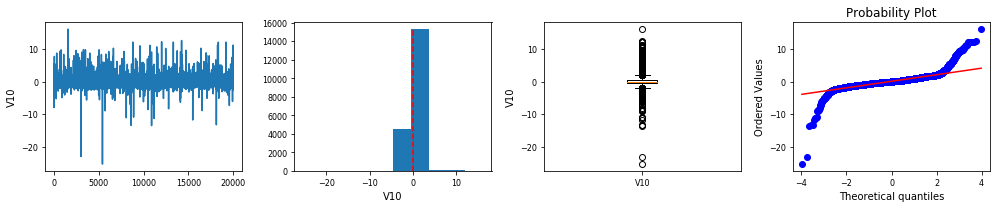

myplots V10


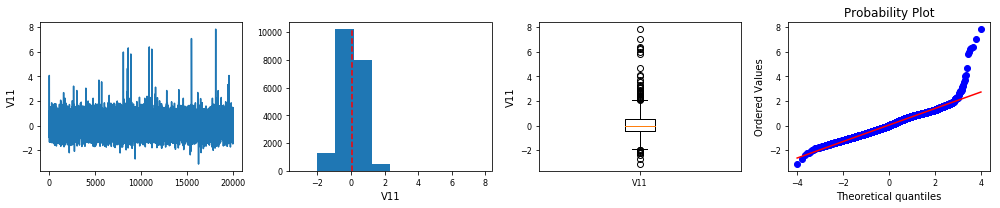

myplots V11


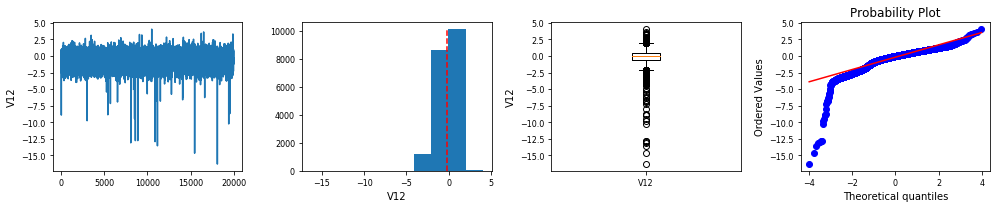

myplots V12


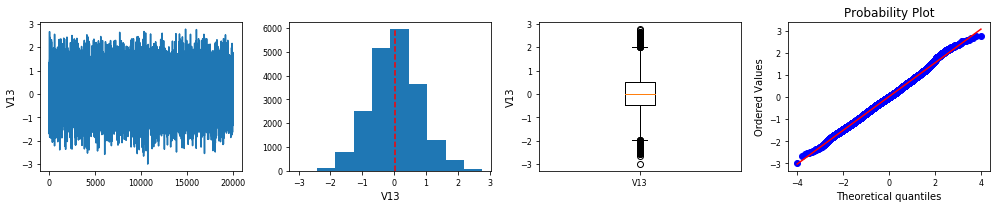

myplots V13


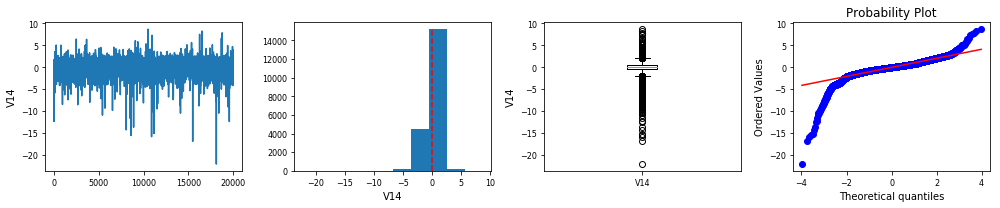

myplots V14


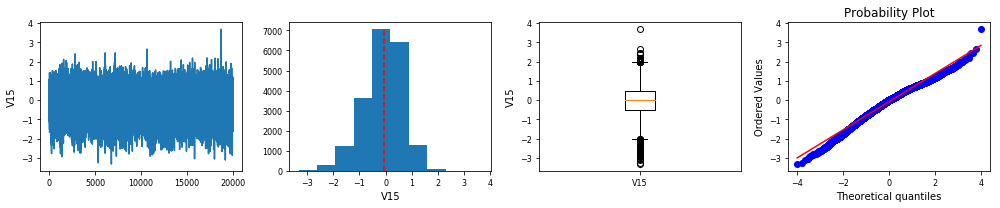

myplots V15


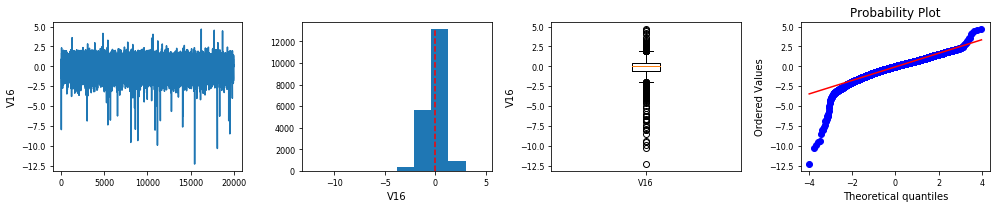

myplots V16


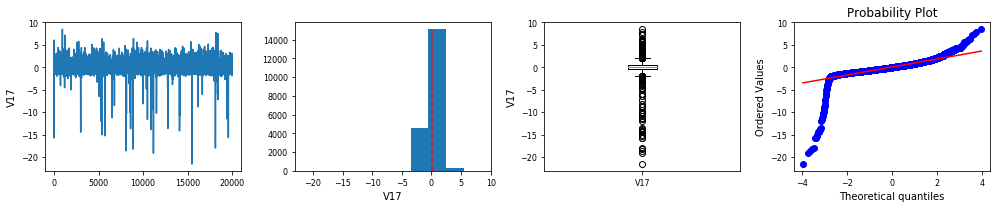

myplots V17


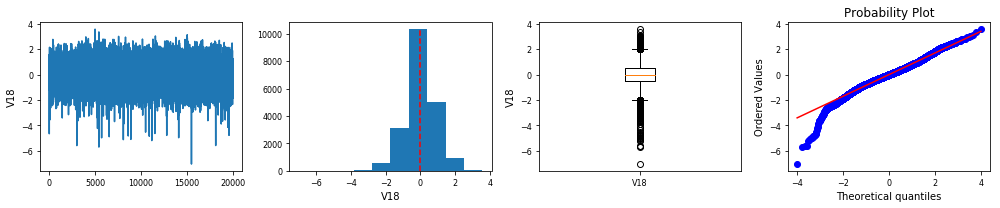

myplots V18


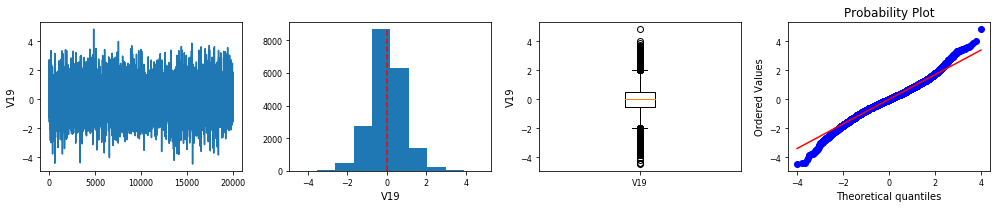

myplots V19


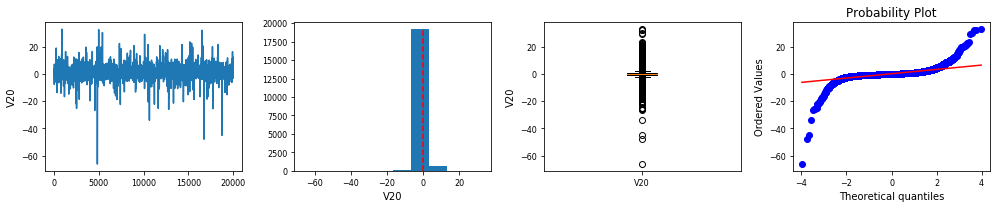

myplots V20


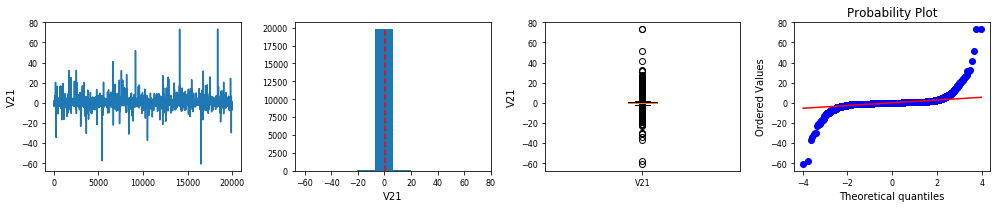

myplots V21


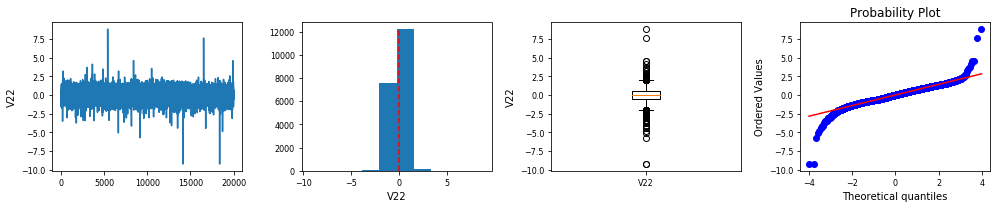

myplots V22


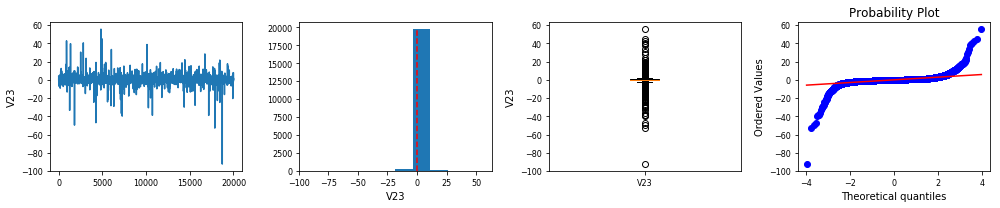

myplots V23


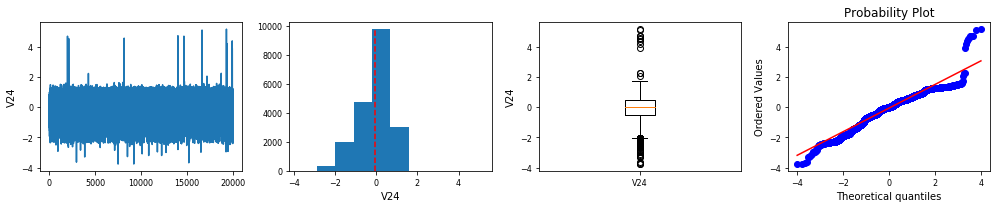

myplots V24


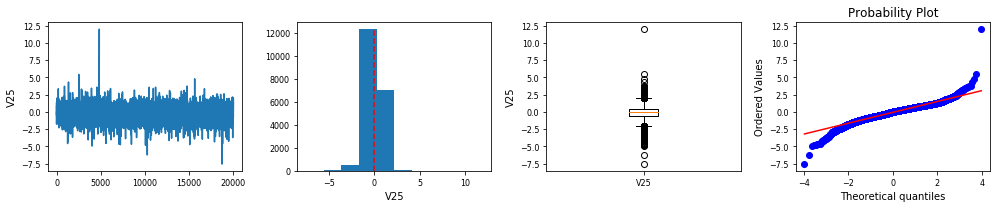

myplots V25


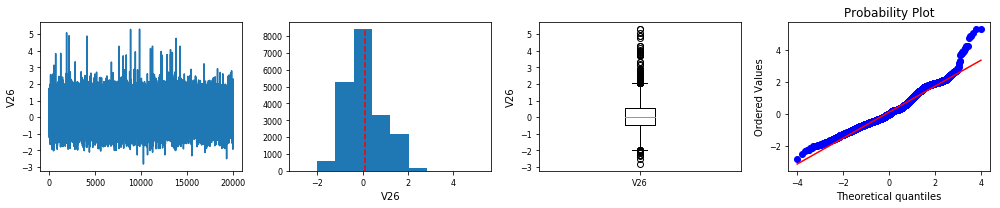

myplots V26


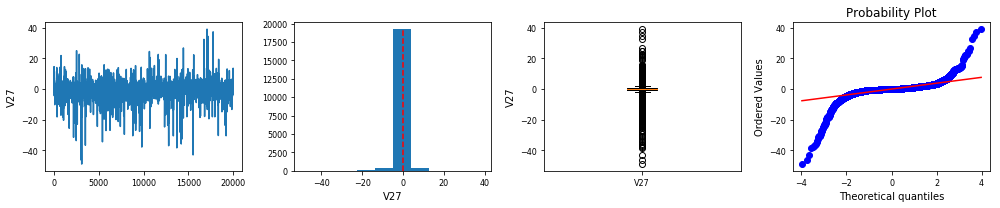

myplots V27


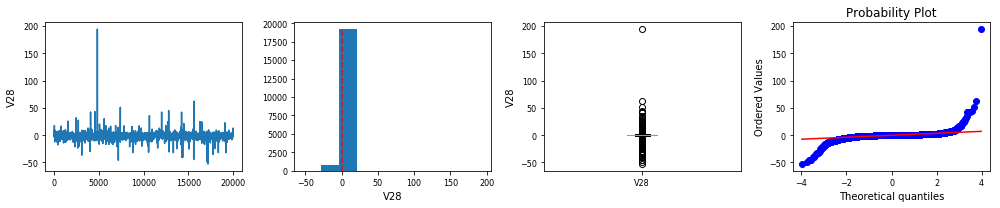

myplots V28


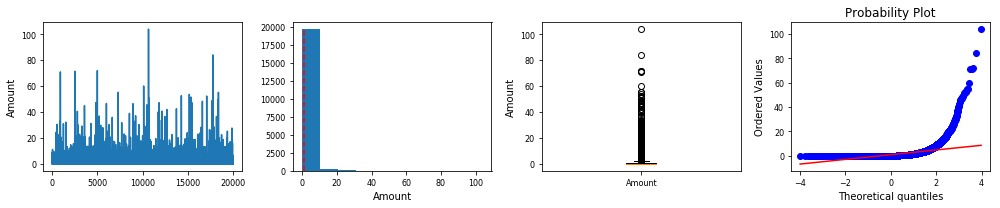

myplots Amount


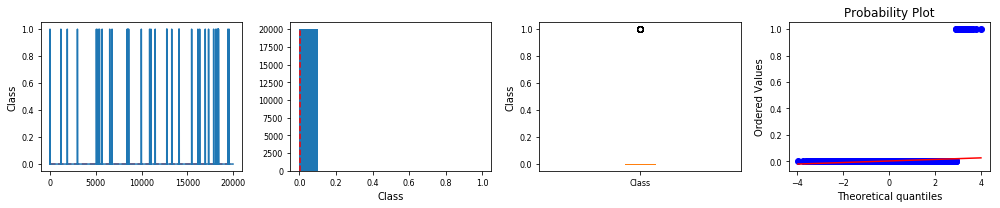

myplots Class


In [17]:
""" TODO
Re-visualize the pre-processed data
use visualize.featureplots()
"""
visualize.featureplots(X, feature_names)
visualize.featureplots(y.values, ['Class'])

# SVMs: EXPLORATION

In [18]:
""" TODO
Hold out a subset of the data, before training and cross validation
using train_test_split, with stratify NOT equal to None, and a test_size 
fraction of .2.

For this exploratory section, the held out set of data is a validation set.
For the GridSearch section, the held out set of data is a test set.
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [62]:
#[x for x in range(len(actual_labels)) if actual_labels[x] == 1]
len(np.where(y_test==1)[0])

7

In [19]:
""" TODO
Create and train SVC models. 
Explore various configurations of the hyper-parameters. 
Train the models on the training set and evaluate them for the training and
validation sets.

Play around with C, gamma, and class_weight. Feel free to play with other hyper-
parameters as well. See the API for more details.
C is a regularization parameter, gamma is the inverse of the radius of influence
of the support vectors (i.e. lower gamma means a higher radius of influence of the 
support vectors), and class weight determines whether to adjust the weights inversely
to the class fractions.
"""

classifier = SVC(kernel='poly', C=1, degree=2, gamma = 'auto', class_weight={0:0.1,1:0.9})
#pred = cross_val_predict(classifier, X_train, y_train, cv = 10)




ROC AUC: 0.9992610683198698
PRC AUC: 0.9136870316054151
PSS: 0.9331
F1 Score 0.9180


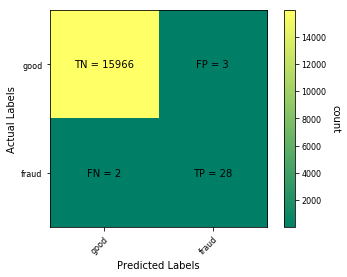

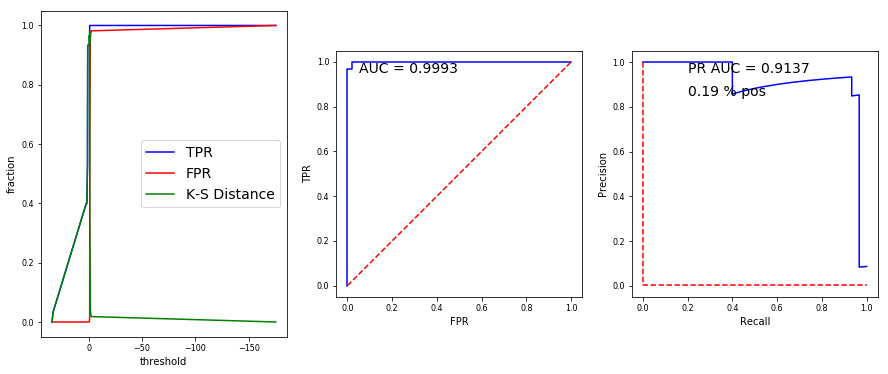

In [20]:
""" TODO
Evaluate training set performance. 
Display the confusion matrix, KS plot with
the cumulative distributions of the TPR and FPR, the ROC curve and the 
precision-recall curve (PRC). use metrics_plots.ks_roc_prc_plot(ytrue, scores)

The PRC, unlike the AUC, does not consider the true negative (i.e. TN) counts,
making the PRC more robust to unbalanced datasets.
"""
# TODO: Confusion matrix
# First, compute the predictions for the training set
# Second, use confusion_matrix
# Third, use metrics_plots.confusion_mtx_colormap() to display the matrix

classifier.fit(X_train, y_train)
preds = classifier.predict(X_train)
confusion = confusion_matrix(y_train, preds)
metrics_plots.confusion_mtx_colormap(confusion, targetnames, targetnames, 'count')

# TODO: Curves
# First, use the model's decision function to compute the scores
# Second, use metrics_plots.ks_roc_prc_plot() to display the KS plot, ROC, and PRC

scores = classifier.decision_function(X_train)
metrics_plots.ks_roc_prc_plot(y_train, scores)

pss_train = metrics_plots.skillScore(y_train.values, preds)
f1_train = f1_score(y_train.values.ravel(), preds)
print("PSS: %.4f" % pss_train[0])
print("F1 Score %.4f" % f1_train)

ROC AUC: 0.8587528174305034
PRC AUC: 0.7098356117725438
PSS: 0.7135
F1 Score 0.6667


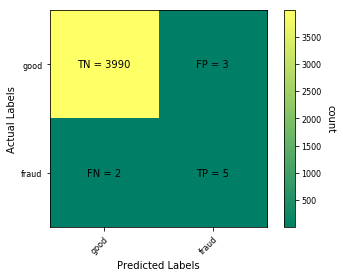

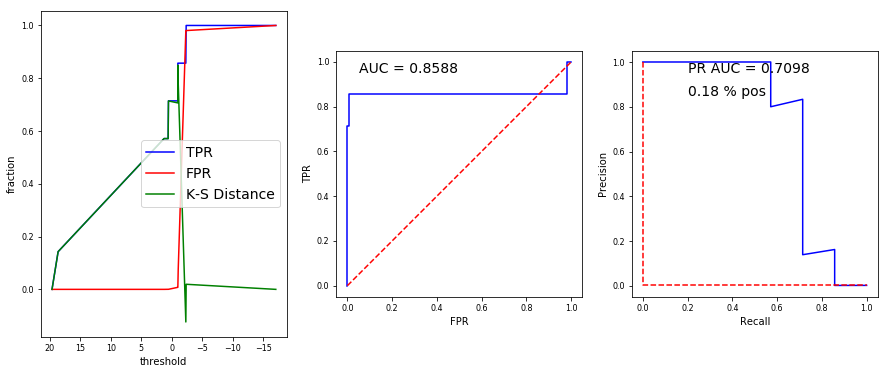

In [21]:
""" TODO
Evaluate validation performance. 
Display the confusion matrix, KS plot with the cumulative distributions of the TPR 
and FPR, the ROC curve and the precision-recall curve (PRC).
"""
# TODO: Confusion matrix


preds_test = classifier.predict(X_test)
confusion = confusion_matrix(y_test, preds_test)
metrics_plots.confusion_mtx_colormap(confusion, targetnames, targetnames, 'count')

# TODO: Curves

scores = classifier.decision_function(X_test)
metrics_plots.ks_roc_prc_plot(y_test, scores)


pss_test = metrics_plots.skillScore(y_test.values, preds_test)
f1_test = f1_score(y_test.values.ravel(), preds_test)
print("PSS: %.4f" % pss_test[0])
print("F1 Score %.4f" % f1_test)

# SVMs: STRATIFIED GRID SEARCH

## Scorers

In [22]:
""" PROVIDED
List of available scoring functions from the sklearn module
"""
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## Execute Grid Search

In [31]:
""" TODO
Estimated time: <30 min on mlserver
Set up and run the grid search using GridSearchCV and the following 
settings:
* SVC for the model,
* The above scoring dictionary for scoring,
* refit set to 'f1' as the optimized metric
* Three for the number of cv folds, 
* n_jobs=-1, 
* verbose=2, 
* return_train_score=True
"""
# Optimized metric
opt_metric = 'f1'
scoring = {opt_metric:opt_metric}

# Flag to re-load previous run
force = True
# File previous run is saved to
srchfname = "hw8_search_" + opt_metric + ".pkl"

# SETUP EXPERIMENT HYPERPARAMETERS
Cs = [.5, 1, 10, 100, 200]
gammas = np.logspace(-4, 0, num=5, endpoint=True, base=5)

nCs = len(Cs)
ngammas = len(gammas)

hyperparams = {'C':Cs, 'gamma':gammas, 'tol':[1e-4],
               'class_weight':[None, 'balanced']}

# RUN EXPERIMENT
time0 = timelib.time()
search = None
if force or (not os.path.exists(srchfname)):
    # TODO: Create the GridSearchCV object
    search = GridSearchCV(classifier, hyperparams, scoring=scoring, n_jobs=-1, refit='f1', cv=3, verbose=2, return_train_score=True)# TODO
    
    # TODO: Execute the grid search by calling fit using the training data
    search.fit(X_train, y_train)
    
    # TODO: Save the grid search object

    joblib.dump(search, srchfname)
    print("Saved %s" % srchfname)
else:
    search = joblib.load(srchfname)
    print("Loaded %s" % srchfname)

time1 = timelib.time()
duration = time1 - time0
print("Elapsed Time: %.2f min" % (duration / 60))

search

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    8.0s finished


Saved hw8_search_f1.pkl
Elapsed Time: 0.16 min


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight={0: 0.1, 1: 0.9}, coef0=0.0,
                           decision_function_shape='ovr', degree=2,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.5, 1, 10, 100, 200],
                         'class_weight': [None, 'balanced'],
                         'gamma': array([0.0016, 0.008 , 0.04  , 0.2   , 1.    ]),
                         'tol': [0.0001]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring={'f1': 'f1'}, verbose=2)

# RESULTS

In [32]:
""" PROVIDED
Display the head of the results for the grid search
See the cv_results_ attribute
"""
all_results = search.cv_results_
df_res = pd.DataFrame(all_results)
df_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,param_tol,params,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,mean_train_f1,std_train_f1
0,0.072375,0.004954,0.017378,0.001132,0.5,None,0.0016,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.00...",0.428571,0.400000,0.333333,0.387302,0.039904,50,0.500000,0.777778,0.562500,0.613426,0.118982
1,0.083559,0.005092,0.018450,0.001394,0.5,None,0.008,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.00...",0.705882,0.400000,0.666667,0.590850,0.135897,17,0.750000,0.810811,0.787879,0.782897,0.025075
2,0.085125,0.016039,0.017362,0.003215,0.5,None,0.04,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.04...",0.777778,0.444444,0.625000,0.615741,0.136240,11,0.947368,0.974359,0.974359,0.965362,0.012723
3,0.083063,0.004361,0.015886,0.001573,0.5,None,0.2,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.2,...",0.700000,0.500000,0.588235,0.596078,0.081838,13,0.974359,0.974359,1.000000,0.982906,0.012087
4,0.077396,0.005914,0.014616,0.002044,0.5,None,1,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 1.0,...",0.480000,0.272727,0.588235,0.446988,0.130904,33,1.000000,1.000000,1.000000,1.000000,0.000000


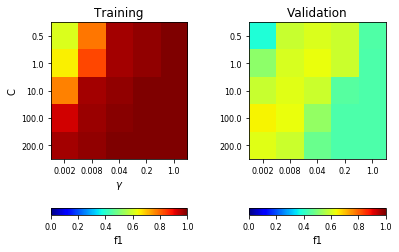

In [33]:
""" PROVIDED
Plot the mean training and validation results from the grid search as a
colormap, for C (y-axis) vs the gamma (x-axis), for class_weight=None
"""
results_grid_train = df_res['mean_train_'+opt_metric].values.reshape(nCs, 2, ngammas)
results_grid_val = df_res['mean_test_'+opt_metric].values.reshape(nCs, 2, ngammas)

fig, axs = plt.subplots(1, 2, figsize=(6,6))
fig.subplots_adjust(wspace=.45)
axs = axs.ravel()
means = [("Training", results_grid_train),
         ("Validation", results_grid_val)]
for i, (name, result) in enumerate(means):
    img = axs[i].imshow(result[:,0,:], cmap="jet", vmin=0, vmax=1)
    axs[i].set_title(name)
    axs[i].set_xticks(range(ngammas))
    axs[i].set_yticks(range(nCs))
    axs[i].set_xticklabels(np.around(gammas, 3))
    axs[i].set_yticklabels(np.around(Cs, 3))
    axs[i].figure.colorbar(img, ax=axs[i], label=opt_metric, 
                           orientation='horizontal')
    if i == 0:
        axs[i].set_xlabel(r"$\gamma$")
        axs[i].set_ylabel("C")
#fig.suptitle('class_weight=None')

In [34]:
""" TODO
Obtain the best model from the grid search and 
fit it to the full training data
"""

best_search = search.best_estimator_
best_search.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.0016, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)

ROC AUC: 0.9992610683198698
PRC AUC: 0.9136870316054151
PSS: 0.9328
F1 Score 0.8485


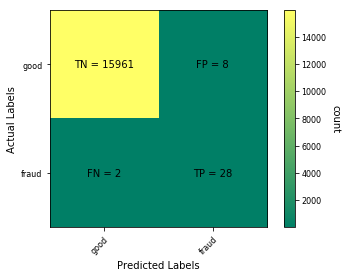

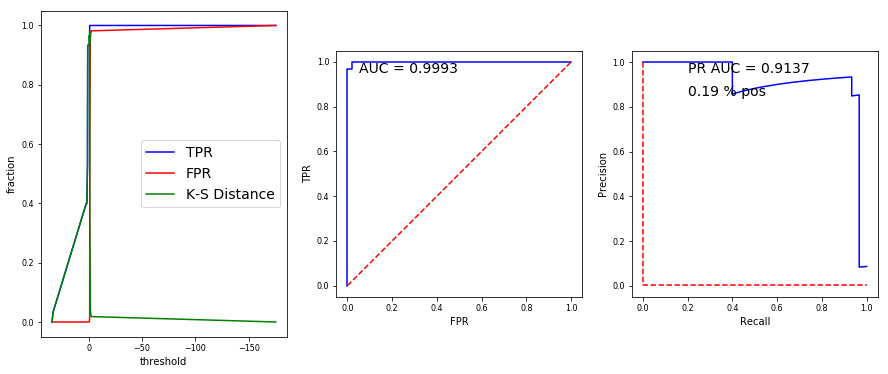

In [35]:
""" TODO
For the best model, display the confusion matrix, KS plot, ROC curve, 
and PR curve for the training set
"""
# TODO: Confusion Matrix
preds = best_search.predict(X_train)
confusion = confusion_matrix(y_train, preds)


# TODO: Curves

metrics_plots.confusion_mtx_colormap(confusion, targetnames, targetnames, 'count')
scores = classifier.decision_function(X_train)
metrics_plots.ks_roc_prc_plot(y_train, scores)


pss_res = metrics_plots.skillScore(y_train.values, preds)
f1_res = f1_score(y_train.values.ravel(), preds)
print("PSS: %.4f" % pss_res[0])
print("F1 Score %.4f" % f1_res)

ROC AUC: 0.8587528174305034
PRC AUC: 0.7098356117725438
PSS: 0.7138
F1 Score 0.7143


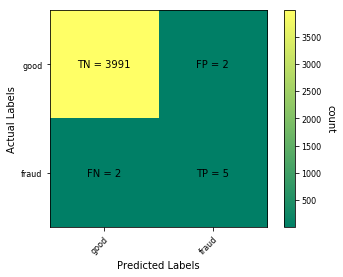

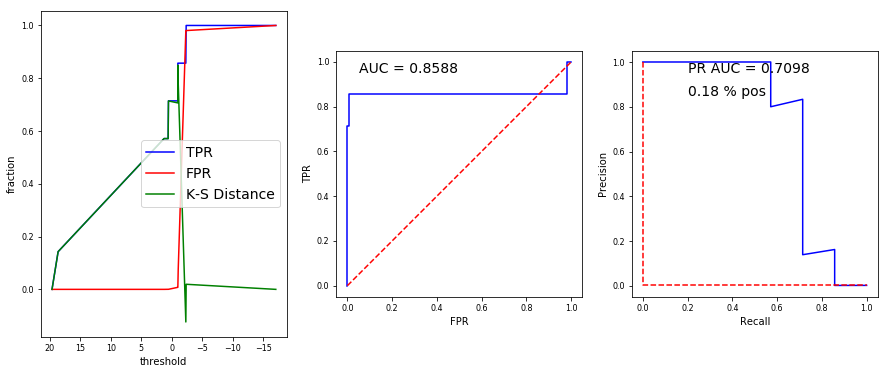

In [36]:
""" TODO
For the best model, display the confusion matrix, KS plot, ROC curve, 
and PR curve for the test set
"""
# TODO: Confustion Matrix


preds_test = best_search.predict(X_test)
confusion = confusion_matrix(y_test, preds_test)
metrics_plots.confusion_mtx_colormap(confusion, targetnames, targetnames, 'count')

# TODO: Curves

scores = classifier.decision_function(X_test)
metrics_plots.ks_roc_prc_plot(y_test, scores)



pss_res_test = metrics_plots.skillScore(y_test.values, preds_test)
f1_res_test = f1_score(y_test.values.ravel(), preds_test)
print("PSS: %.4f" % pss_res_test[0])
print("F1 Score %.4f" % f1_res_test)


In [45]:
y_test.values

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

7
3993


[Text(0.5, 1.0, 'scores')]

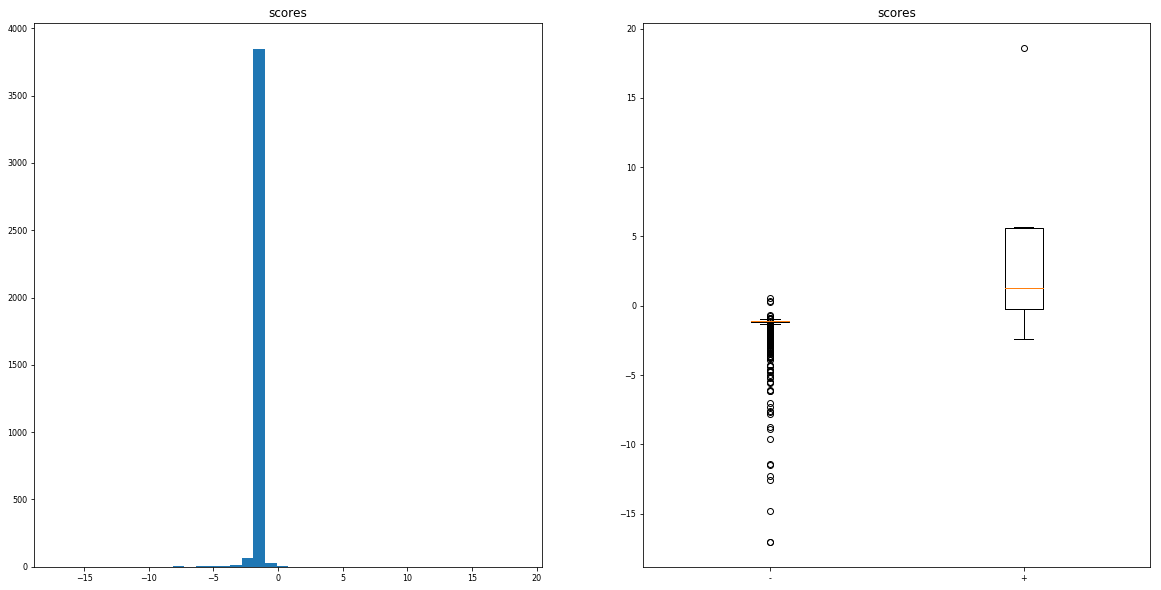

In [69]:
""" TODO
Plot a histogram of the test scores from the best model.
Compare the distribution of scores for positive and negative examples
using boxplots.

Create one subplot of the distribution of all the scores, with a histogram. 
Create a second subplot comparing the distribution of the scores of the 
positive examples with the distribution of the negative examples, with boxplots.
"""
# TODO: Obtain the indices of the pos and neg examples
actual_labels = y_test.values
positive = [x for x in range(len(actual_labels)) if actual_labels[x] == 1]
negative = [x for x in range(len(actual_labels)) if actual_labels[x] == 0]
print(len(positive))
print(len(negative))

# TODO: Separate the scores for the pos and neg examples

score_pos = scores[positive]
score_neg = scores[negative]

# TODO: Plot the distribution of all scores
nbins = 40




# TODO: Plot the boxplots of the pos and neg examples' scores
fig, axs = plt.subplots(1, 2, figsize = (20,10))

#ax = fig.add_axes([0, 0, 1, 1]) 
axs[0].hist(scores, nbins) 
axs[0].set(title = 'scores')
axs[1].boxplot([score_neg, score_pos])
axs[1].set_xticklabels(['-', '+'])
axs[1].set(title='scores')

# Discussion
In a few brief paragraphs, discuss and interpret the test results for the best model. Include a brief discussion of the difference in the meaning of the AUC for the ROC vs the AUC for the PRC. Also, discuss the histogram and boxplots of the scores.


<h3>Best model</h3>
The test results for both best model and random classifier is very good at performance with ROC AUC 0.85 and PRC AUC 0.70. But, there is not much difference between them. The best model only performed well on negative values with improved F1 score to 0.71 from 0.66.

<h3>ROC AUC and PR AUC</h3>
ROC AUC looks at true positive rate TPR and false positive rate FPR while PR AUC looks at Precision and Recall. If the data set is unbalanced and you care about positive values then  PR AUC is better choice since it is very sensitive to to the improvements for the positive class. If the dataset is balanced and you care about both positives and negatives then ROC AUC is better choise.

<h3>Histogram and boxplots</h3>
By looking at histogram, we can see that most of the predicted scores are below 0 to -2.5 since we have more negative examples. There were very few positive examples which lies above 0. From positive boxplot, since 2 of them are misclassified the box plot contains scores that are in negative region.




